## Importing all the required librabies for model building for US Home price predictions.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Importing file from local computer to Jupyter environment & converting it from excel to csv format.

In [2]:
df = pd.read_excel(r"C:\Users\HP\Documents\My_Notebooks\Home_Price_Prediction_Dataset1.xlsx")
df.to_csv(r"C:\Users\HP\Documents\My_Notebooks\Home_Price_Prediction_Dataset.csv",index= None,header = True)

## EDA

## Top 5

In [3]:
df.head()

,UNEMP,CONST,Months of Supply,Mortgage Rate,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale,Homes Sold,HPI
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.4,NaN,7.0,9.8950,NaN,7567.597,1551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.3,NaN,7.6,10.1975,NaN,6583.558,1437.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.2,NaN,7.8,10.2680,NaN,8752.084,1289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.4,NaN,8.3,10.3700,NaN,8478.328,1248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking correlation of attributes

In [4]:
df.corr()

,UNEMP,CONST,Months of Supply,Mortgage Rate,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale,Homes Sold,HPI
UNEMP,1.000000,-0.612062,0.254630,-0.187428,-0.620807,-0.451682,-0.619254,-0.026602,0.045984,0.368465,-0.591361,-0.471829,-0.475520,-0.214574
CONST,-0.612062,1.000000,-0.267542,0.002101,0.728514,0.894791,0.707971,0.258350,0.299266,0.148305,0.336573,0.635403,0.659715,0.672193
Months of Supply,0.254630,-0.267542,1.000000,0.084015,-0.597482,-0.383459,-0.581264,0.135489,0.101026,-0.050040,-0.024782,0.215606,-0.511021,0.198451
Mortgage Rate,-0.187428,0.002101,0.084015,1.000000,0.477967,-0.447903,0.311652,-0.848019,-0.840132,-0.626819,0.777169,0.578205,0.549204,-0.573638
Permits-Number,-0.620807,0.728514,-0.597482,0.477967,1.000000,0.675443,0.985902,-0.384314,-0.339375,-0.248335,0.537757,0.627790,0.962433,0.007435
Permits-Valuation,-0.451682,0.894791,-0.383459,-0.447903,0.675443,1.000000,0.561623,0.150559,0.191698,0.112215,0.291591,0.501709,0.707764,0.491187
Housing Starts,-0.619254,0.707971,-0.581264,0.311652,0.985902,0.561623,1.000000,-0.409020,-0.366008,-0.272211,0.550619,0.634266,0.960717,-0.018793
Consumption,-0.026602,0.258350,0.135489,-0.848019,-0.384314,0.150559,-0.409020,1.000000,0.976414,0.625203,-0.470089,-0.318743,-0.487215,0.825240
Disposable Income,0.045984,0.299266,0.101026,-0.840132,-0.339375,0.191698,-0.366008,0.976414,1.000000,0.770121,-0.466464,-0.289667,-0.427616,0.839682
Savings,0.368465,0.148305,-0.050040,-0.626819,-0.248335,0.112215,-0.272211,0.625203,0.770121,1.000000,-0.415914,-0.310901,-0.272967,0.526203


## Information about not null count and column data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNEMP              371 non-null    float64
 1   CONST              250 non-null    float64
 2   Months of Supply   371 non-null    float64
 3   Mortgage Rate      372 non-null    float64
 4   Permits-Number     299 non-null    float64
 5   Permits-Valuation  371 non-null    float64
 6   Housing Starts     371 non-null    float64
 7   Consumption        251 non-null    float64
 8   Disposable Income  251 non-null    float64
 9   Savings            251 non-null    float64
 10  Fed Funds Rate     252 non-null    float64
 11  Homes for Sale     251 non-null    float64
 12  Homes Sold         251 non-null    float64
 13  HPI                250 non-null    float64
dtypes: float64(14)
memory usage: 40.9 KB


**We've got Not null count along with data types of each of the column**

## Count of data type of varibles.

In [6]:
df.dtypes.value_counts()

float64    14
dtype: int64

## Null count w.r.t columns

In [7]:
df.isnull().sum()

UNEMP                  2
CONST                123
Months of Supply       2
Mortgage Rate          1
Permits-Number        74
Permits-Valuation      2
Housing Starts         2
Consumption          122
Disposable Income    122
Savings              122
Fed Funds Rate       121
Homes for Sale       122
Homes Sold           122
HPI                  123
dtype: int64

## Summarization of whole data

In [8]:
df.describe(include = "all")

,UNEMP,CONST,Months of Supply,Mortgage Rate,Permits-Number,Permits-Valuation,Housing Starts,Consumption,Disposable Income,Savings,Fed Funds Rate,Homes for Sale,Homes Sold,HPI
count,371.000000,250.000000,371.000000,372.000000,299.000000,371.000000,371.000000,251.000000,251.000000,251.000000,252.000000,251.000000,251.000000,250.000000
mean,5.912129,428859.360000,5.720216,6.068938,1353.414716,15296.481571,1303.221024,10494.132271,12123.450996,818.369323,1.716926,310.019920,697.844622,161.092720
std,1.739832,122721.914363,1.751631,1.876129,439.988234,6388.851137,399.019413,2353.486378,1712.412383,623.919634,1.898628,113.227398,299.572702,30.094918
min,3.500000,236512.000000,3.500000,2.684000,513.000000,4096.211000,478.000000,6535.300000,9307.100000,202.200000,0.049000,142.000000,270.000000,100.552000
25%,4.600000,340081.750000,4.300000,4.292500,1047.500000,9681.043000,1053.500000,8606.700000,10770.350000,432.150000,0.144833,217.500000,438.000000,140.224250
50%,5.500000,415920.000000,5.300000,6.103750,1387.000000,14561.311000,1288.000000,10151.400000,11875.800000,756.800000,1.034516,302.000000,627.000000,161.623000
75%,6.850000,537308.750000,6.500000,7.483750,1655.500000,19944.262000,1567.500000,12383.500000,13431.550000,1021.300000,2.400726,351.000000,940.000000,182.837000
max,14.700000,678562.000000,12.200000,10.477500,2263.000000,32303.090000,2273.000000,14880.500000,17287.100000,6413.700000,6.544516,570.000000,1389.000000,229.409000


**From the above, we could infer that mean and median values of each columns are nearly equal so we can continue with the current columns.**

## We will visually explore the missing values in each column.

<AxesSubplot:>

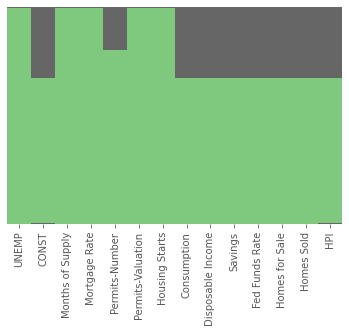

In [9]:
sns.heatmap(df.isnull(),yticklabels = False,cbar= False,cmap ="Accent")

**There are missing values in 'CONST','Permits-Number','Consumption','Disposable Income', 'Savings', 'Fed Funds Rate', 'Homes for Sale','Homes Sold', 'HPI' columns.**

## We will treat missing values accordingly.

In [10]:
df["CONST"].fillna(df["CONST"].mean(),inplace = True)

In [11]:
df["Permits-Number"].fillna(df["Permits-Number"].mean(),inplace = True)

In [12]:
df["Consumption"].fillna(df["Consumption"].mean(),inplace = True)

In [13]:
df["Disposable Income"].fillna(df["Disposable Income"].mean(),inplace = True)

In [14]:
df["Savings"].fillna(df["Savings"].mean(),inplace = True)

In [15]:
df["Fed Funds Rate"].fillna(df["Fed Funds Rate"].mean(),inplace = True)

In [16]:
df["Homes for Sale"].fillna(df["Homes for Sale"].mean(),inplace = True)

In [17]:
df["Homes Sold"].fillna(df["Homes Sold"].mean(),inplace = True)

In [18]:
df["HPI"].fillna(df["HPI"].mean(),inplace = True)

**We've successfully filled the missing values of columns with fillna() command**

## Checking nan values for all columns based upon the error while training the data with for loop.

In [19]:
for i in df.columns:
    if df[i].hasnans:
        print(i)
        print(df[i].dtypes)

UNEMP
float64
Months of Supply
float64
Mortgage Rate
float64
Permits-Valuation
float64
Housing Starts
float64


**From the above we could infer that 'UNEMP','Months of Supply','Mortgage Rate','Permits-Valuation','Housing Starts' are the columns having NaN values.**

## Replacing NaN values with '0'

In [20]:
 df['UNEMP'] = df['UNEMP'].replace(np.nan, 0)

In [21]:
 df['Months of Supply'] = df['Months of Supply'].replace(np.nan, 0)

In [22]:
 df['Mortgage Rate'] = df['Mortgage Rate'].replace(np.nan, 0)

In [23]:
 df['Permits-Valuation'] = df['Permits-Valuation'].replace(np.nan, 0)

In [24]:
 df['Housing Starts'] = df['Housing Starts'].replace(np.nan, 0)

**We've replaced NaN value with '0' instead of mean or median.**

## Let's Build Linear Regression model

## 1.Identifyting the Target variable

**HPI is our target variable**

## 2. Separating Attribute(x) & Target(y)

In [25]:
x = df.drop("HPI",axis= 1) #declaring x variable
y = df["HPI"] # declaring y variable

## 3.Checking the shape of "x" & "y"

In [26]:
print("Shape of x is :" ,x.shape) #checking shape of x
print("Shape of y is :" ,y.shape) #checking shape of target variable

Shape of x is : (373, 13)
Shape of y is : (373,)


## 4.Train_Test_Split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 5,test_size=0.2)

**Successfully fitted x & y in train test split with 80% train data & 20% test data.**

## 5.Checking the shape of train & test

In [28]:
print("Shape of x_train is : ", x_train.shape)
print("Shape of x_test is : ", x_test.shape)
print("Shape of y_train is : ", y_train.shape)
print("Shape of y_test is : ", y_test.shape)

Shape of x_train is :  (298, 13)
Shape of x_test is :  (75, 13)
Shape of y_train is :  (298,)
Shape of y_test is :  (75,)


**We've confirmed 80:20 ratio of train & test.**

## 6.Initializing the model

In [29]:
home_lr = LinearRegression() #Instantiate the Linear Model

## 7.Fitting model with train values.

In [30]:
home_lr.fit(x_train,y_train)

LinearRegression()

**Successfully fitted train & test data of both attribute & target variables in Linear Model**

## 8.Predicting the values

In [31]:
y_pred_test =home_lr.predict(x_test) #declaring target predictable variable

In [32]:
pd.DataFrame({"Actual Values": y_test , "Model Predictions": y_pred_test})

,Actual Values,Model Predictions
89,161.09272,159.977151
47,161.09272,162.531425
326,187.39500,189.771462
108,161.09272,159.393981
291,163.10200,160.127720
...,...,...
286,159.24500,156.949455
56,161.09272,160.713077
230,150.01200,150.643593
300,168.07500,166.655602


**Fitted Actual test value & predicted test values by Linear model in Data Frame & observing it by column vise.**

## Let's Visualize Test data.

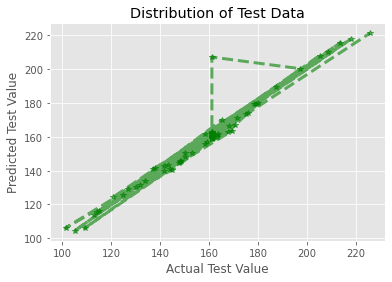

In [33]:
plt.plot(y_test,y_pred_test,color ="g",linewidth = 3,linestyle="--",marker ='*',alpha = 0.6)
plt.xlabel("Actual Test Value")
plt.ylabel("Predicted Test Value")
plt.title("Distribution of Test Data")
plt.grid(True)
plt.show();

**From the above,we could infer that there is only one outlier which does not impact models performance to that extend so i've kept it as is. Model is well distributed along the linear line & is ideal for House price prediction**

In [34]:
y_pred_train = home_lr.predict(x_train) #declaring target predictable variable

In [35]:
pd.DataFrame({"Actual Values": y_train , "Model Predictions": y_pred_train})

,Actual Values,Model Predictions
168,140.18000,144.200526
252,142.06100,139.932508
312,176.58700,174.940653
107,161.09272,159.698270
288,160.99900,158.069357
...,...,...
73,161.09272,160.246240
118,161.09272,158.813075
189,176.43700,175.155157
206,184.59900,179.812891


**Fitted Actual train value & predicted train values by Linear model in Data Frame & observing it by column vise.**

## Let's visualize Train Data

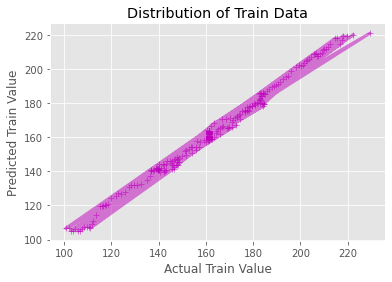

In [36]:
plt.plot(y_train,y_pred_train,color ="m",linewidth = 3,linestyle="-",alpha = 0.5,marker = "+")
plt.xlabel("Actual Train Value")
plt.ylabel("Predicted Train Value")
plt.title("Distribution of Train Data")
plt.grid(True)
plt.show();

**From the above,we could infer that Model is well distributed along the linear line & is ideal for House price prediction**

## Visualize Train & Test Data Together with Scatter plot

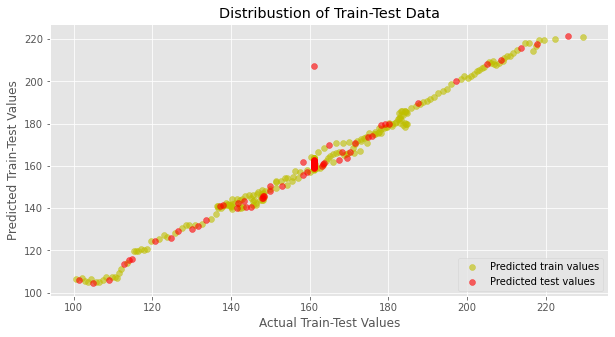

In [37]:
plt.figure(figsize=(10,5)) # use to vary size of the graph..
plt.scatter(y_train,y_pred_train,color ='y',alpha = 0.6,label = "Predicted train values")
plt.scatter(y_test,y_pred_test,color="r",alpha = 0.6,label= "Predicted test values")
plt.xlabel("Actual Train-Test Values")
plt.ylabel("Predicted Train-Test Values")
plt.title("Distribustion of Train-Test Data")
plt.legend(loc ="lower right")
plt.grid(True)
plt.show();

**We have visualized the data points of Train & Test data together and are well distributed as seen above.** 

## Finally some model evaluation with Mathematics

In [38]:
print("The RMSE value of testing dataset is")
print(np.sqrt(mean_squared_error(y_test ,y_pred_test))) # actual values,predictions

The RMSE value of testing dataset is
5.792319988239393


## Test RMSE of 5.79 means prices may varies +- 5.79 e.g if price is INR 100 Model will either predict 105.79 or 94.21 and that is permissible.

In [39]:
print("The RMSE value of training dataset is")
print(np.sqrt(mean_squared_error(y_train ,y_pred_train))) # actual values,predictions

The RMSE value of training dataset is
2.285943145154491


## Train RMSE of 2.28 means prices may varies +- 2.28 e.g if price is INR 100 Model will either predict 102.28 or 97.72 and that is permissible.

In [40]:
r2 =r2_score(y_test,y_pred_test)

In [41]:
r2

0.9423079267092134

In [42]:
r2 =r2_score(y_train,y_pred_train)
r2

0.9913803199245492

**Both r2_score are close to 1 which is characteristics of generalised model**

**0 - Worst Model**

**1 - Best Model**

**We have identified 3 factors which are responsible for US Home prices**

**Demand Factors - Unemployment, Mortgage rate, Months of supply, Home starts, construction, Savings, Disposable income**

**Supply factors - Home for sale, Home sold, consumption, permits-valuation, Permits-Number**

**National Factor - Fed Funds rate & Unemployment**


## End of US House price prediction of Linear Model.